In [111]:
# Import commands
%matplotlib inline
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Day 08 - MATH/PHYS 241

Now that we have covered numerical techniques for differentiation and integration, we are in a position to discuss methods to solve [differential equations](https://en.wikipedia.org/wiki/Differential_equation) with computers.

While you may not have studied differential equations as a stand-alone subject (yet!), there is no doubt you have seen a differential equation at some point (in fact, we have introduced a few already in earlier notebooks). A great example is a population model for exponential growth:

$$
\begin{align}
\frac{dP}{dt} &= kP \tag{1}
\end{align}
$$

The left-hand-side of the equation gives the rate of change in the population ($\frac{dP}{dt}$). On the right-hand-side, we have the observed population size ($P$) and a rate constant ($k$). What we typically want is to find an equation that gives the population at some later time ($P_t$). To do that, we need to solve the equation. This equation has an analytical solution we can solve for using the method of separtion of variables:

$$
\begin{align}
\int_{P_0}^{P_t} \frac{dP}{P} &= \int_{0}^{t} k \ dt \tag{2} \\
\\
\ln\frac{P_t}{P_0} &= kt \tag{3} \\
\\
P_t &= P_0 e^{kt} \tag{4}
\end{align}
$$

The above example is one you might see within the first few days of a differential equations class and fall into a category called [ordinary differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation).

# Boundary Conditions

As you already know from other physics classes, ODEs are not completely specified by their equations alone. In order to get a solution, you also need to specify one or more *boundary conditions*. These are algebraic conditions on the variables at one or more points. Sometimes they are simple conditions, like $x = 0$ at $t = 0$; other times they can be complex algebraic equations between the variables. Boundary conditions can be used to divide ODEs into two broad classes:

* Initial Value Problems (IVP)
* Boundary Value Problems (BVP)

Typically IVPs are easier to solve and are the main focus of today's notebook.

If we are using the computer to help us solve the ODE, we will need an approach that relies on arithmetic. Fortunately, Euler comes to the rescue (like always).

# Euler's Method

The classic way to solve a differential equation is to start with the known initial value of the dependent variable, $y_0 = y(t=0)$, and then use the derivative function $f(t, y)$ to find an approximate value for $y$ at a small step $\Delta t = h$, forward in time.

Put another way, what we are doing is solving for future values of $y_{i+1}$ by using the previous value, $y_i$, and evaluating the function at $i$, $f(t_i, y_i)$ multiplied by our time step $h$:

$$
\begin{align}
y_{i+1} &= y_i + hf(t_i, y_i) \tag{5}
\end{align}
$$

To solve our ODE (or system of ODEs), we simply start at $t = t_0$ and and step forward $h$ over time until we reach a desired endpoint $t = t_{f}$.

To implement this method in python, we can write a method that will take input of:
* a given function $f(t, y)$
* initial value $y_0$
* time $t$ to solve over

In [103]:
# Euler's Method - Single Step
def euler(f, y0, h):

  """
  f is the function we want to solve
  y0 is the initial value
  h is the time step size
  """

  return y0 + h* f(h, y0)

Let's test out the method with an exponential decay problem (negative of exponential growth).

$$
\begin{align}
\frac{dy}{dt} &= -2y \tag{6}
\end{align}
$$



In [104]:
# Define the ODE to solve
def f(t, y):
    return -2 * y

For this equation, we can also include the exact solution pretty easily, so let's do that:

In [105]:
def y_exact(t):
    return np.exp(-2 * t)

Now, let's just perform a single time step of size $h=0.2$, starting at $t_0 = 0$ and $y_0 = 1$, satisfying the initial values required.

We can then plot the result against the exact solution to see how Euler's Method compares.  

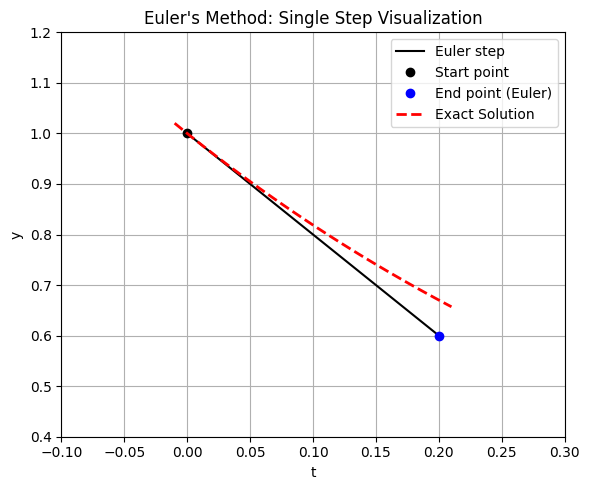

In [106]:
# Choose step size and initial conditions
h = 0.2
t0 = 0
y0 = 1

# Plot a detailed visualization of Euler's method for one step

# Compute one Euler step
t1 = t0 + h
y1 = euler(f, y0, h)

# find exact solution over a small range
t_exact = np.linspace(-0.01, 0.21, 100)  # Create a range of t values
y_exact_values = y_exact(t_exact)

# Plot
plt.figure(figsize=(6, 5))
plt.plot([t0, t1], [y0, y1], 'k-', label="Euler step")
plt.plot(t0, y0, 'ko', label="Start point")
plt.plot(t1, y1, 'bo', label="End point (Euler)")
plt.plot(t_exact, y_exact_values, 'r--', label='Exact Solution', linewidth=2)
plt.title("Euler's Method: Single Step Visualization")
plt.xlabel('t')
plt.ylabel('y')
plt.xlim(-0.1, 0.3)
plt.ylim(0.4, 1.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We see that Euler's Method has fallen off the exact solution line. Let's carry out the method untill $t_{end} = 2$, keeping with the current step size. We can expect the result to likely match fairly poorly with the exact solution.

## Class Problem 1

Using the functions above, find a way to calculate Euler's Method over 2 seconds using $h_1 = 0.2$ and $h_2 = 0.02$ for step sizes. Make a plot of the results.

It should be clear that Euler's Method requires a small $h$ to get a somewhat decent result. However, this means you need to perform more calculations, which is not ideal since that will lead to an increase in computational/round-off error over time. Not to mention an increase in compute time.

However, similar to the Trapazoid Rule for integration, Euler's Method is the starting-off point for better methods, such as Runga-kutta Methods.

# Runga-kutta Methods

An easy way to improve Euler's Method is to add a "trial" step that is half the full $h$ step, and evaluating the function at that time interval: $t_{i + 1/2} = t_i + h/2$. This will produce:

$$
\begin{align}
k_1 &= f(t_i, y_i) \tag{7} \\
\\
k_2 &= f(t_{i}+\frac{h}{2}, y_{i}+\frac{h}{2} k_1) \tag{8} \\
\\
y_{i+1} &= y_i + hk_2 \tag{9}
\end{align}
$$

Where $k_1$ is the slope evaluated at point $i$ and $k_2$ is the slope evaluated at point $i+h/2$. Note that the equation for $k_2$ uses the slope from $k_1$ to "update" it's value.

Equations 7, 8, and 9 make up the RK2 Method. The method is an improvement over Euler's Method, but still requires fairly small step sizes to be accurate. If we were to write the process out as a function:

In [107]:
# RK2 Method (Midpoint) - Single Step
def rk2(f, y0, h):

  k1 = f(h, y0)
  k2 = f(h + h/2, y0 + h/2 * k1)

  return y0 + h * k2

You might be wondering (or not...) if we can't just repeat the "half-step" precess a 2nd time to find a $k_3$, then use this value to find $k_4$ as a full step? If so, you're right! We can! The process looks like:

$$
\begin{align}
k_1 &= f(t_i, y_i) \tag{10} \\
\\
k_2 &= f(t_{i}+\frac{h}{2}, y_{i}+\frac{h}{2} k_1) \tag{11} \\
\\
k_3 &= f(t_{i}+\frac{h}{2}, y_{i}+\frac{h}{2} k_2) \tag{12} \\
\\
k_4 &= f(t_{i}+h, y_{i}+hk_3) \tag{13} \\
\\
y_{i+1} &= y_i + \frac{h}{6}(k_1 +2k_2+2k_3+k_4) \tag{14}
\end{align}
$$

So besides finding 4 different slopes, this method uses all 4 and weights them in its final equation to find the value of $y_{i+1}$. This version of the process is known as the RK4 Method, and is by far the most popular ODE solver for numerical applications.

If we are to code it up:

In [108]:
# RK4 Method
def rk4(f, y0, h):

    k1 = f(h, y0)
    k2 = f(h + h/2, y0 + h/2 * k1)
    k3 = f(h + h/2, y0 + h/2 * k2)
    k4 = f(h + h, y0 + h * k3)

    return y0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)

## Class Problem 2

Create a plot of the error of each method vs time using a step size $h = 0.2$, and initial conditions $t_0 = 0$ and $y_0 = 1$.

## Class Problem 3

The [simple harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator) is a classic problem from introductory physics. The equation describes motion we would expect to see from a spring:

$$
\begin{align}
F &= -kx \tag{15}
\end{align}
$$

Where $F$ is the force, $k$ is the spring constant, and $x$ is the displacement from equilibrium (or position assuming $x=0$ is the rest position).

Our goal here is to get the RK4 method to solve for the position and velocity over a set amount of time. To do this, we need to feed the algorithm equations that it can iterate over.

From Newton's 2nd law ($F = ma$), we can rewrite 15 as:

$$
\begin{align}
a &= -\frac{k}{m}x \tag{16} \\
\\
\frac{dv}{dt} &= -\frac{k}{m}x \tag{17}
\end{align}
$$

Where in equation 17 we have used the fact that acceleration ($a$) is equal to the derivative of the velocity ($v$) with respect to time. This is an equation we can feed into RK4; however, we need to feed in an equation for $\frac{dx}{dt}$ as well as we will need to iteratively solve for the position and velocity.

$$
\begin{align}
\frac{dx}{dt} &= v \tag{18}
\end{align}
$$

Equations 17 and 18 form a system of differential equations that will need to be solved simultaneously as they are coupled. This can be done using the RK4 method, but requires some tweeks on our part.

First, we can define a function that gives the Simple Harmonic Oscillator as differential equations we will numerically solve:

In [109]:
# function for the Simple Harmonic Oscillator

def sho(state, t):

    # Ensure state is an iterable of length 2
    if isinstance(state, (list, tuple, np.ndarray)):
        if len(state) == 2:
            x, v = state
        else:
            raise ValueError("state must have exactly two elements (x, v)")
    else:
        raise TypeError("state must be an iterable with two elements (x, v)")

    # Define parameters
    k = 5.0
    m = 1.0

    return [v, -(k/m)*x]

The function above takes a two specific inputs:
* a variable of length 2 called "state" that contains the current state values (position and velocity)
* the time

Note: while the SHO equation is not explicitely time dependent, we include time anyway because it is standard practice to do so.

Because our function has two equations it must solve simultaneously, we will need to update our RK4 method to provide two outputs instead of just one:

In [110]:
# defines the rk4 function for coupled equations

def rk4_sho(f, y0, t, h):
    k1 = f(y0, t)
    k2 = f([y0[0] + h/2 * k1[0], y0[1] + h/2 * k1[1]], t + h/2)
    k3 = f([y0[0] + h/2 * k2[0], y0[1] + h/2 * k2[1]], t + h/2)
    k4 = f([y0[0] + h * k3[0], y0[1] + h * k3[1]], t + h)

    return [y0[0] + h/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]),
            y0[1] + h/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])]

**1)** Using the functions above, solve for the position and velocity as a function of time over 20 seconds. Assume the starting position is $x_0 = 5$ and the initial velocity is $v_0 = 0$. Make plots of each.

**2)** Because we are not including drag/friction, the system is conservative. This means the total energy should be constant. For a spring, that means $E = T + U = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$. Evaluate the total energy. Does the RK4 method show the energy changes over time due to error in the calculation?

## Class Problem 4

For most cases in your future, you will likely use a pre-built ODE solver instead of writing your own. The [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) includes several versions to choose from, but the most common for initial value problems is based on RK4.

Use `solve_ivp()` to evaluate the simple harmonic oscillator problem.